## ***DATA CUSTOMER LIFETIME VALUE ASSURANCE***
### by : Victoria Rambe

#### Business Problem Understanding

Sebuah perusahaan asuransi ingin mendeteksi perilaku pelanggannya dalam melakukan klaim asuransi. Berikut merupakan data pelanggan dengan nomor polis asuransi kendaraannya masing-masing. Perusahaan ini melihat pelanggan mana yang sering melakukan klaim asuransi dimasa depan, apakah mereka benar-benar melakukan klaim asurasi sesuai premi yang mereka bayarkan. Penjelasan tentang pelanggan dan asuransi yang diambil untuk kendaraan yang ada dapat dilihat melalui variable dependent total nilai klaim yang dapat dilihat dari fitur yang mempengaruhi total klaim yaitu nilai customer lifetime value yang disebut juga dengan nilai keseluruhan pendapatan yang perusahaan dapatkan dari pelanggan tersebut, pendapatan, premi bulanannya.


**Problem Statement :**

Proses pengecekan klaim assuransi akan memakan waktu lama jika perusahaan tidak mendeteksi pola klaim assuransi sebelumnya. Perusahaan ingin melihat pola klaim asuransi lakukan oleh customernya, sehingga perusahaan dapat melihat pelanggan tipe mana yang sering melakukan klaim assuransi dimasa mendatang.

Jika premi yang diberikan kepada pelanggan tidak sesuai dengan nilai klaim asuransi, maka lifetime value customer akan sangat mempengaruhi nilai pendapatan yang akan dipengaruhi oleh perusahaan

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan sama akan melakukan klaim asuransi dimasa mendatang. Sehingga perusahaan dapat menentukan nilai premi yang sesuai melihat dari nilai pendapatan dari pelanggan seperti apa yang akan mereka dapatkan.

Dan perusahaan ingin mengetahui faktor/variabel apa yang membuat seorang pelanggan melakukan klaim assuransi, sehingga perusahaan dapat membuat rencana yang lebih baik dalam menargetkan premi bulanan yang harusnya dibayarkan oleh pelanggannya.

**Analytic Approach :**

Jadi yang disini kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan melakukan klaim assuransi sejenis dikemudian hari.

Kemudian kita akan membangun model regresi yang akan membantu perusahaan untuk dapat memprediksi nilai premi dimasa mendatang.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi nilai premi sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Vehicle Class | Object | Tipe kelas kendaraan |
| Coverage | Object | Cakupan |
| Renew Offer Type | Object | Pembaharuan jenis penawaran |
| EmploymentStatus | Object | Status pekerjaan |
| Marital Status | Object | Status pernikahan pelanggan |
| Education | Object | Tingkat pendidikan pelanggan |
| Number of Policies | Float | Nomor Polis |
| Monthly Premium Auto | Float | Auto premi bulanan |
| Total Claim Amount | Float | Total nilai klaim |
| Income | Float | Pendapatan rumah tangga pelanggan |
| Customer Lifetime Value | Float | Nilai seumur hidup pelanggan |

In [23]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')

In [24]:
pd.set_option('display.max_colwidth', None)

#### Load Dataset

In [25]:
df = pd.read_csv("data_customer_lifetime_value.csv")
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


#### Melihat tipe data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### **Data Preprocessing**

Kita akan melakukan cleansing data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada.

#### Mengecek data yang kosong (missing value)

In [27]:
df.isnull().sum().sort_values(ascending = False)

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

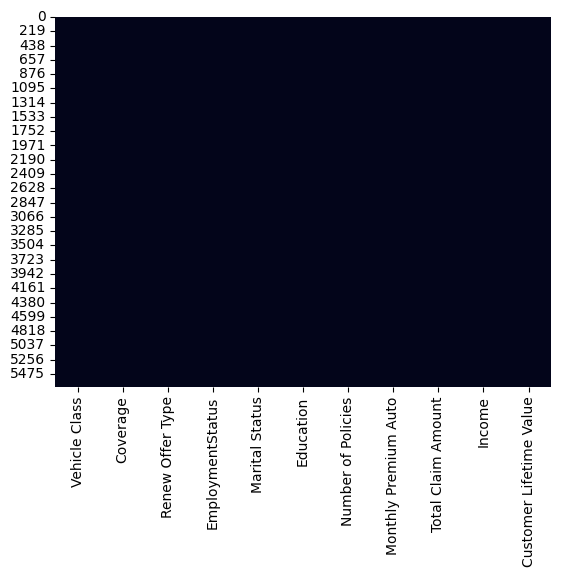

In [28]:
sns.heatmap(df.isnull(), cbar=False); 

#### **Melihat unique value dari masing-masing kolom**

In [29]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().unique())]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueValue'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,object,0,0.0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,object,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,float64,0,0.0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,float64,0,0.0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,float64,0,0.0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Fitur 'Renew Offer Type' dan 'EmploymentStatus' tidak diperlukan untuk membangun model prediktif harga premi pelanggan baru

In [30]:
# Drop beberapa kolom yang tidak diperlukan
df.drop(['Renew Offer Type', 'EmploymentStatus'], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Marital Status           5669 non-null   object 
 3   Education                5669 non-null   object 
 4   Number of Policies       5669 non-null   float64
 5   Monthly Premium Auto     5669 non-null   float64
 6   Total Claim Amount       5669 non-null   float64
 7   Income                   5669 non-null   float64
 8   Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(4)
memory usage: 398.7+ KB


#### Total pelanggan yang memegang polis asuransi berdasarkan Status pernikahan

In [32]:
df['Marital Status'].value_counts()

# Total ada 5669 data pelanggan

Married     3305
Single      1514
Divorced     850
Name: Marital Status, dtype: int64

#### **EDA - Exploratory Data Analysis**

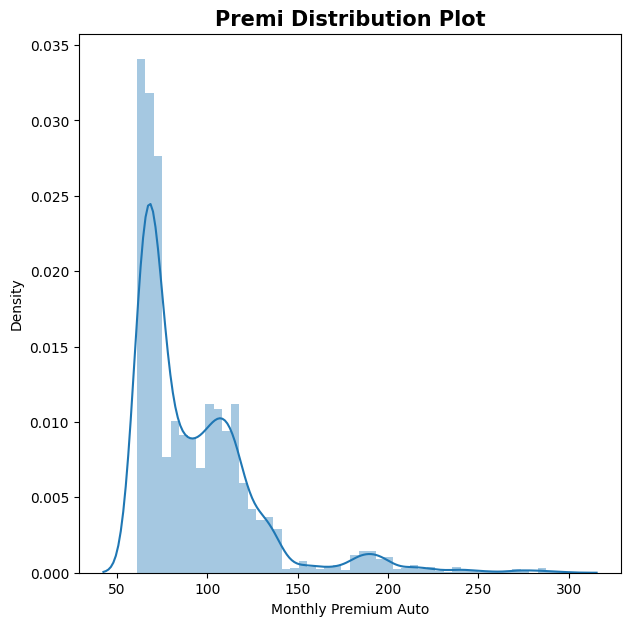

In [33]:
# Distribusi plot dengan fitur 'Monthly Premium Auto' atau nilai premi bulanan
plt.figure(figsize=(7, 7))
sns.distplot(df['Monthly Premium Auto'])
plt.title('Premi Distribution Plot', size=15, weight='bold');

Pada distribusi diatas menunjukkan adanya sebaran 'right-skewed distribution'. Hal ini menunjukkan adanya distribusi positif pada nilai Premi bulanannya

#### **Tipe Assuransi yang mempengaruhi nilai Premi**

In [34]:
# Cek jumlah asuransi berdasarkan Jenis kendaraan dan tipe Cakupan
print(f"Jumlah Asuransi di tiap Vehicle Class:\n{df['Vehicle Class'].value_counts()}")
print(f"\nJumlah tiap Coverage:\n{df['Coverage'].value_counts()}")

Jumlah Asuransi di tiap Vehicle Class:
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: Vehicle Class, dtype: int64

Jumlah tiap Coverage:
Basic       3477
Extended    1704
Premium      488
Name: Coverage, dtype: int64


Dapat dilihat bahwa pemegeang polis asuransi dari perusahaan tersebut paling banyak ialah pengguna jenis mobil Four Door Car dan paling sedikit ialah dari jenis Luxury Car
Dan dilihat dari Cakupan asuransi yang digunakan yaitu paling banyak ialah Cakupan premi Basic dan paling sedikit untuk cakupan premi premium

### **Rata-rata**

In [35]:
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Vehicle Class', columns='Coverage', values='Total Claim Amount', aggfunc='mean')
display(neighbour_pivot)

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,301.672323,388.940882,529.670082
Luxury Car,986.484528,1147.759589,1596.498369
Luxury SUV,977.135820,1097.798400,1382.258848
SUV,515.651239,626.265219,804.949437
Sports Car,489.393007,582.405227,746.336389
Two-Door Car,299.065360,409.045237,542.165149


Dapat disimpulkan rata-rata nilai klaim yang dilakukan oleh pelanggan perusahaan tersebut paling tinggi yaitu dari Jenis Kelas Kendaraan Luxury Car dengan cakupan Premium, dan paling kecil ialah Jenis Kelas Kendaraan Two-Door Car dengan Cakupan Basic

#### **Menyeleksi tipe Cakupan berdasarkan Jenis Kendaraan yang digunakan**

In [36]:
df.groupby(['Vehicle Class', 'Coverage'])['Coverage'].count()

Vehicle Class  Coverage
Four-Door Car  Basic       1750
               Extended     868
               Premium      240
Luxury Car     Basic         64
               Extended      30
               Premium       13
Luxury SUV     Basic         57
               Extended      42
               Premium       16
SUV            Basic        671
               Extended     331
               Premium       94
Sports Car     Basic        183
               Extended      93
               Premium       31
Two-Door Car   Basic        752
               Extended     340
               Premium       94
Name: Coverage, dtype: int64

#### **Melihat pelanggan yang sering melakukan klaim asurasi berdasarkan Jenis kendaraan**

In [37]:
df.groupby(['Vehicle Class'])['Total Claim Amount'].count()

Vehicle Class
Four-Door Car    2858
Luxury Car        107
Luxury SUV        115
SUV              1096
Sports Car        307
Two-Door Car     1186
Name: Total Claim Amount, dtype: int64

#### **Cek median Premi bulanan untuk tiap Jenis kendaraan**

In [38]:
df_median_price = df.groupby(by=['Vehicle Class']).agg({'Monthly Premium Auto':'median'}).reset_index()
df_median_price = df_median_price.set_index('Vehicle Class')
df_median_price = df_median_price.sort_values('Monthly Premium Auto', ascending =False)
df_median_price.head()

,Monthly Premium Auto
Vehicle Class,
Luxury SUV,201.0
Luxury Car,193.0
Sports Car,116.0
SUV,115.0
Four-Door Car,72.0


#### **Plot nilai median dari Premi bulanan untuk tiap Cakupan (Coverage) di setiap Jenis kendaraan**

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,67.0,87.0,110.0
Luxury Car,189.0,223.0,283.0
Luxury SUV,193.0,216.5,273.5
SUV,109.0,129.0,166.0
Sports Car,110.0,132.0,156.0
Two-Door Car,67.0,88.0,110.0


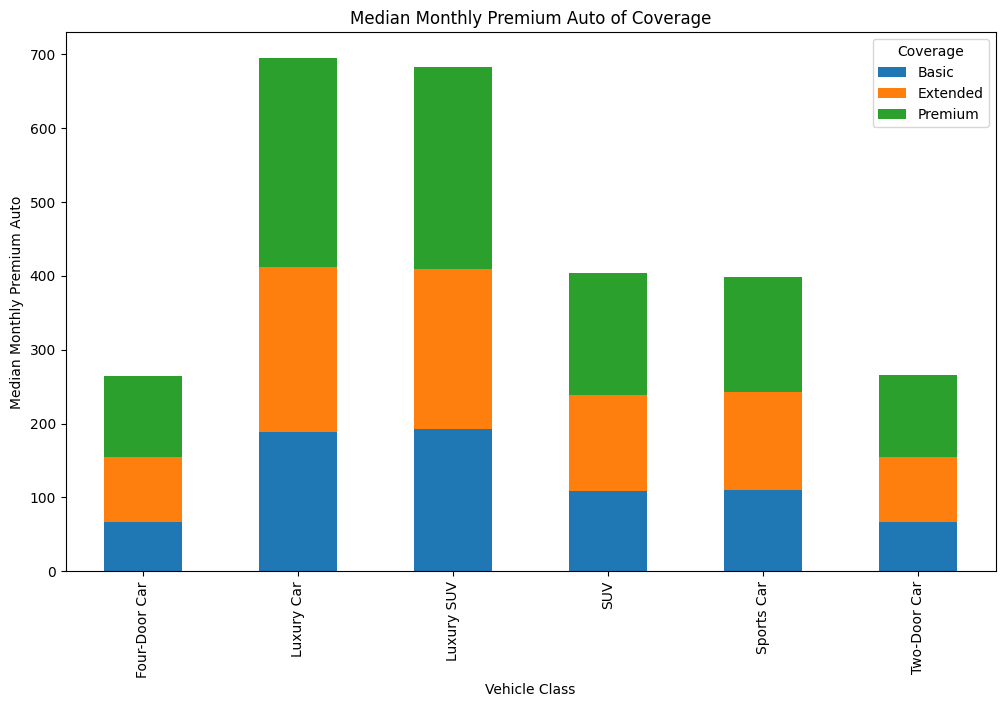

In [39]:
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Vehicle Class', columns='Coverage', values='Monthly Premium Auto', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Vehicle Class')
pivot_plot.set_ylabel('Median Monthly Premium Auto')
pivot_plot.set_title('Median Monthly Premium Auto of Coverage');

 Jenis Kendaraan LuxuryCar memiliki median harga premi tertinggi untuk tiap tipe Coveragenya, dimana median harga premi pada Basic coveragenya mencapai hampir 3 kali lipat harga premi Coverage pada Four-Door Car, yaitu sekitar $189. 

  Seperti yang sudah diketahui, pelanggan yang sering melakukan klaim asuransi adalah pelanggan dengan jenis kendaraan Four-Door Car, tetapi ternyata median premi pelanggan jenis kendaraan Four-Door Car bahkan jauh di bawah pelanggan jenis kendaraan LuxuryCar yang memiliki nilai rata-rata premi per bulan paling rendah.

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Monthly Premium Auto'>

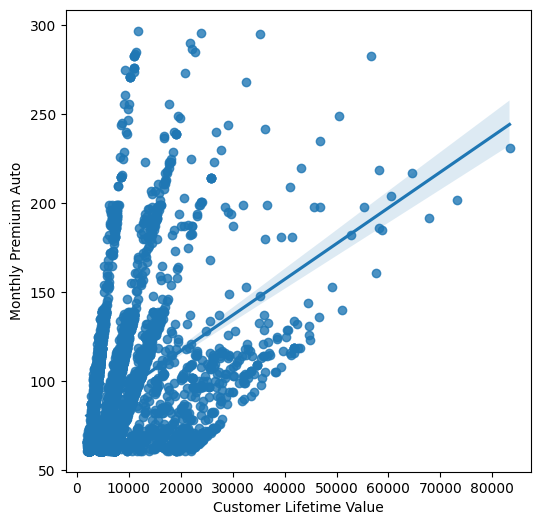

In [40]:
plt.figure(figsize=(6,6))
sns.regplot(x = 'Customer Lifetime Value',y = 'Monthly Premium Auto',data = df)

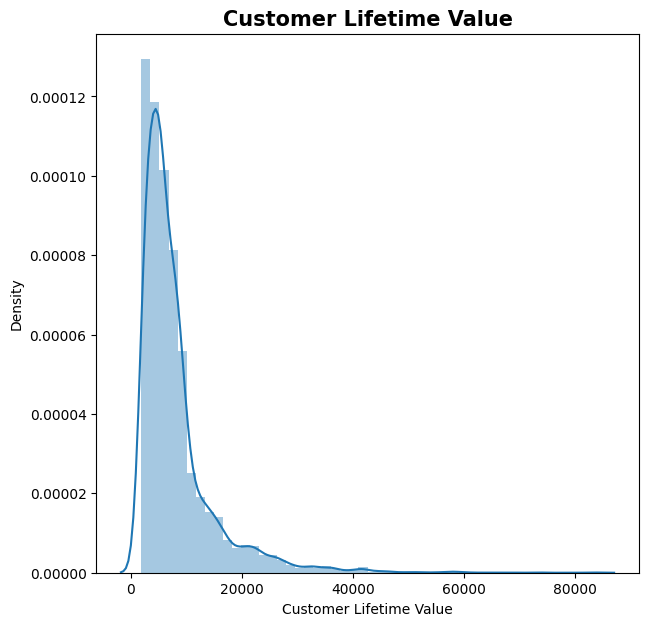

In [41]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value', size=15, weight='bold');

#### **Cek jumlah nomor polis berdasarkan Jenis kendaraan dan tipenya**

In [42]:
print(f"Jumlah Vehicle Class di tiap nomor polis :\n{df['Number of Policies'].value_counts()}")

Jumlah Vehicle Class di tiap nomor polis :
1.0    2008
2.0    1413
3.0     727
7.0     271
5.0     270
9.0     264
4.0     251
6.0     236
8.0     229
Name: Number of Policies, dtype: int64


#### **Grouping Jenis kendaraan berdasarkan Status pernikahan**

In [43]:
df.groupby(['Marital Status', 'Vehicle Class'])['Vehicle Class'].count()

Marital Status  Vehicle Class
Divorced        Four-Door Car     463
                Luxury Car          5
                Luxury SUV         22
                SUV               154
                Sports Car         50
                Two-Door Car      156
Married         Four-Door Car    1639
                Luxury Car         62
                Luxury SUV         63
                SUV               650
                Sports Car        176
                Two-Door Car      715
Single          Four-Door Car     756
                Luxury Car         40
                Luxury SUV         30
                SUV               292
                Sports Car         81
                Two-Door Car      315
Name: Vehicle Class, dtype: int64

#### **Cek median pendapatan (income) untuk jenis kendaraan**

In [44]:
df_median_price = df.groupby(by=['Vehicle Class']).agg({'Income':'median'}).reset_index()
df_median_price = df_median_price.set_index('Vehicle Class')
df_median_price = df_median_price.sort_values('Income', ascending =False)
df_median_price.head()

,Income
Vehicle Class,
Luxury Car,45173.0
Luxury SUV,37899.0
Two-Door Car,36153.0
Four-Door Car,35011.5
SUV,31567.5


#### **Plot median Premi Bulanan untuk tiap status pernihakan di setiap jenis kendaraan**

Marital Status,Divorced,Married,Single
Vehicle Class,,,
Four-Door Car,73.0,72.0,72.0
Luxury Car,193.0,197.0,192.0
Luxury SUV,219.0,202.0,194.0
SUV,117.0,115.0,116.0
Sports Car,116.0,114.5,121.0
Two-Door Car,71.0,72.0,71.0


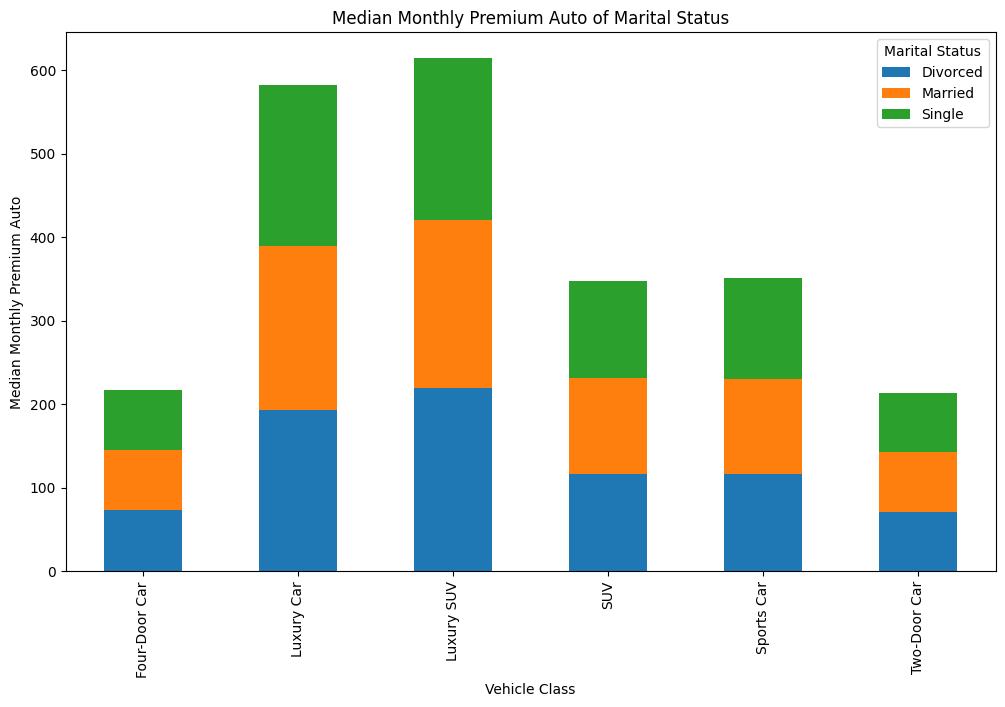

In [45]:
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Vehicle Class', columns='Marital Status', values='Monthly Premium Auto', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Vehicle Class')
pivot_plot.set_ylabel('Median Monthly Premium Auto')
pivot_plot.set_title('Median Monthly Premium Auto of Marital Status');

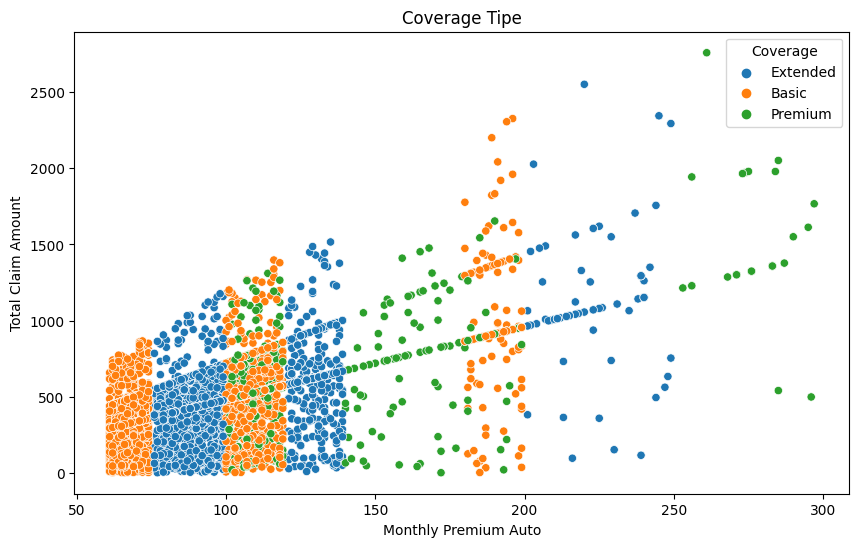

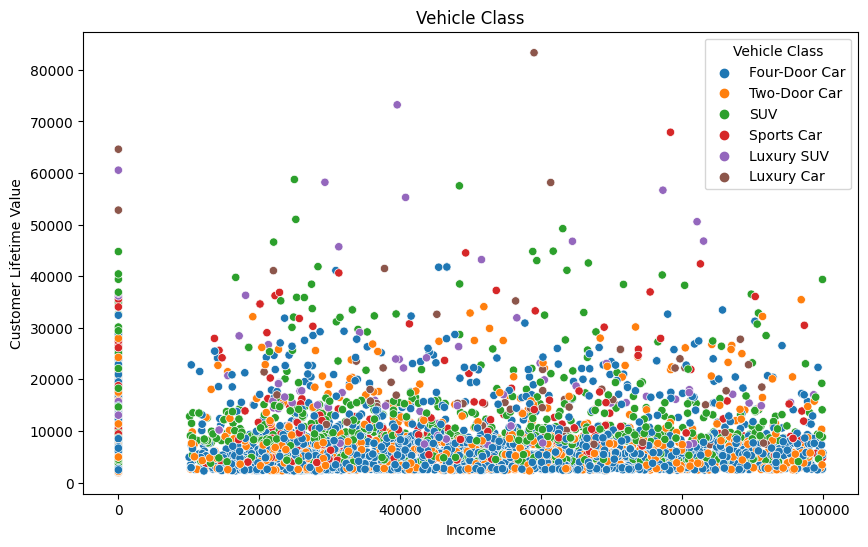

In [46]:
# Plot persebaran 'Coverage'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['Monthly Premium Auto'], df['Total Claim Amount'], hue=df['Coverage']).set_title('Coverage Tipe');

# # Plot persebaran 'Vehicle Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['Income'], df['Customer Lifetime Value'], hue=df['Vehicle Class']).set_title('Vehicle Class');

#### **Melihat jumlah pelanggan polis melalui status pernikahan dan latar belakang pendidikannya**

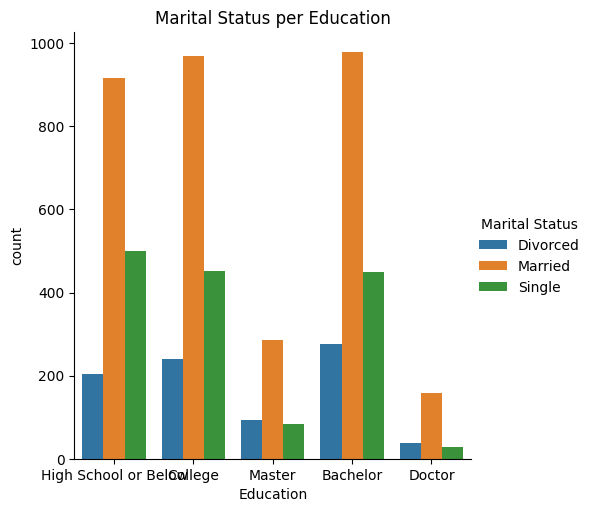

In [47]:
sns.catplot(x='Education', kind='count', hue='Marital Status', data=df);
plt.title('Marital Status per Education');

Dapat dilihat jumlah pelanggan polis asuransi yang terdaftar diperusahaan didominasi oleh pelanggan yang statusnya sudah menikah, dan mayoritas ialah sarjana tingkat pertama. Hal ini bisa didijadikan acuan pelanggan mana yang akan melakukan polis asurasansi dikemudian hari berdasarkan latar belakang pendidikannya.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Marital Status           5669 non-null   object 
 3   Education                5669 non-null   object 
 4   Number of Policies       5669 non-null   float64
 5   Monthly Premium Auto     5669 non-null   float64
 6   Total Claim Amount       5669 non-null   float64
 7   Income                   5669 non-null   float64
 8   Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(4)
memory usage: 398.7+ KB


**Data Correlation**

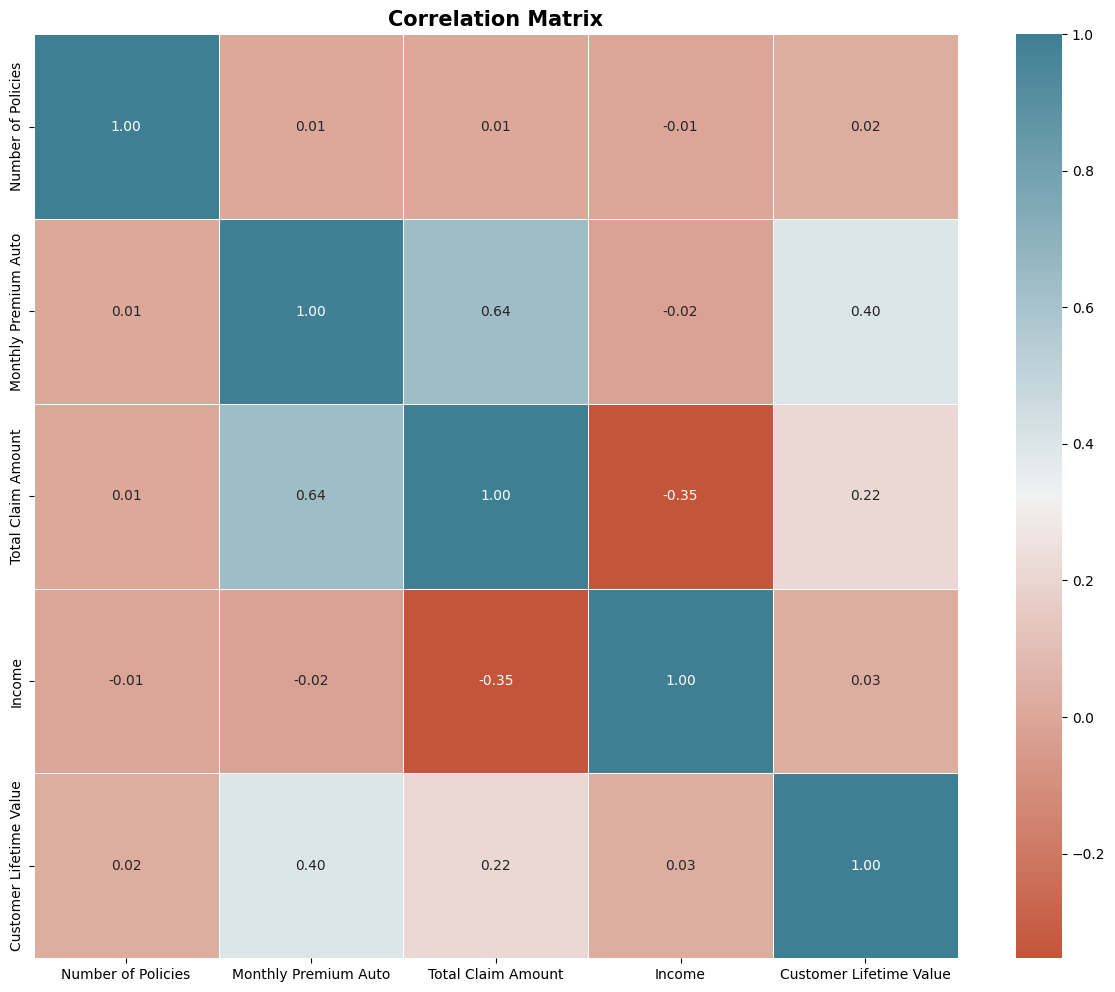

In [49]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur Premi bulanan. Korelasi paling tinggi dimiliki oleh fitur 'income', di mana korelasinya adalah korelasi negatif. Ini berarti semakin rendah pendapatan, maka semakin murah premi yang didapatkan.

**Outliers Detection**

Banyaknya outliers pada data akan memengaruhi hasil analisa dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

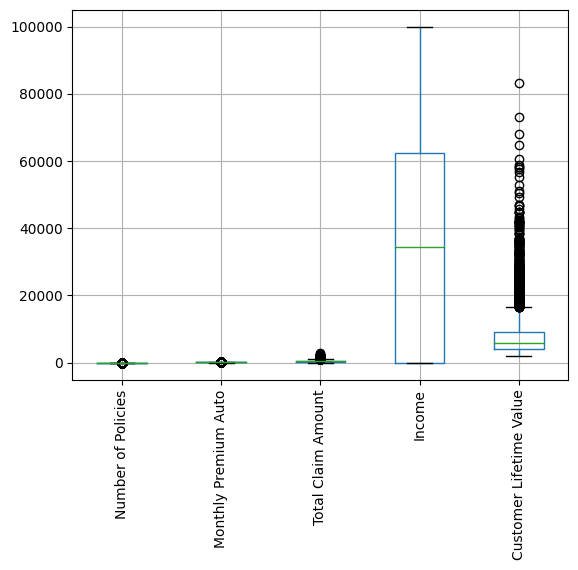

In [50]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

Terlihat banyak outliers pada beberapa fitur. Dalam hal ini, untuk membuat dataset yang lebih bersih dari outliers, maka akan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge.

#### **Membuat fungsi untuk mengecek outliers**

In [51]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [52]:
# Outliers pada fitur premi bulanan
find_anomalies(df['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [53]:
# Outliers pada fitur Total Claim Amount 
find_anomalies(df['Total Claim Amount'])

IQR: 283.053586
limit_bawah: -157.64783699999998
limit_atas: 974.566507


In [54]:
# Outliers pada fitur Pendapatan
find_anomalies(df['Income'])

IQR: 62464.0
limit_bawah: -93696.0
limit_atas: 156160.0


In [55]:
# Outliers pada fitur Customer Lifetime Value
find_anomalies(df['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


Selanjutnya, kita proses feature engineering terhadap fitur-fitur numerikal.

**Monthly Premium Auto**

In [56]:
df['Monthly Premium Auto'].describe()

count    5669.000000
mean       93.026989
std        34.551795
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [57]:
# Cek premi > $170.5
df[df['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

275

Terlihat bahwa 50% data pada kolom Monthly Premium Auto bernilai kurang dari $82, sedangkan nilai maksimalnya adalah $297. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 275 data yang nilai Monthly Premium Auto lebih besar dari $170.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Monthly Premium Auto lebih besar dari $170.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

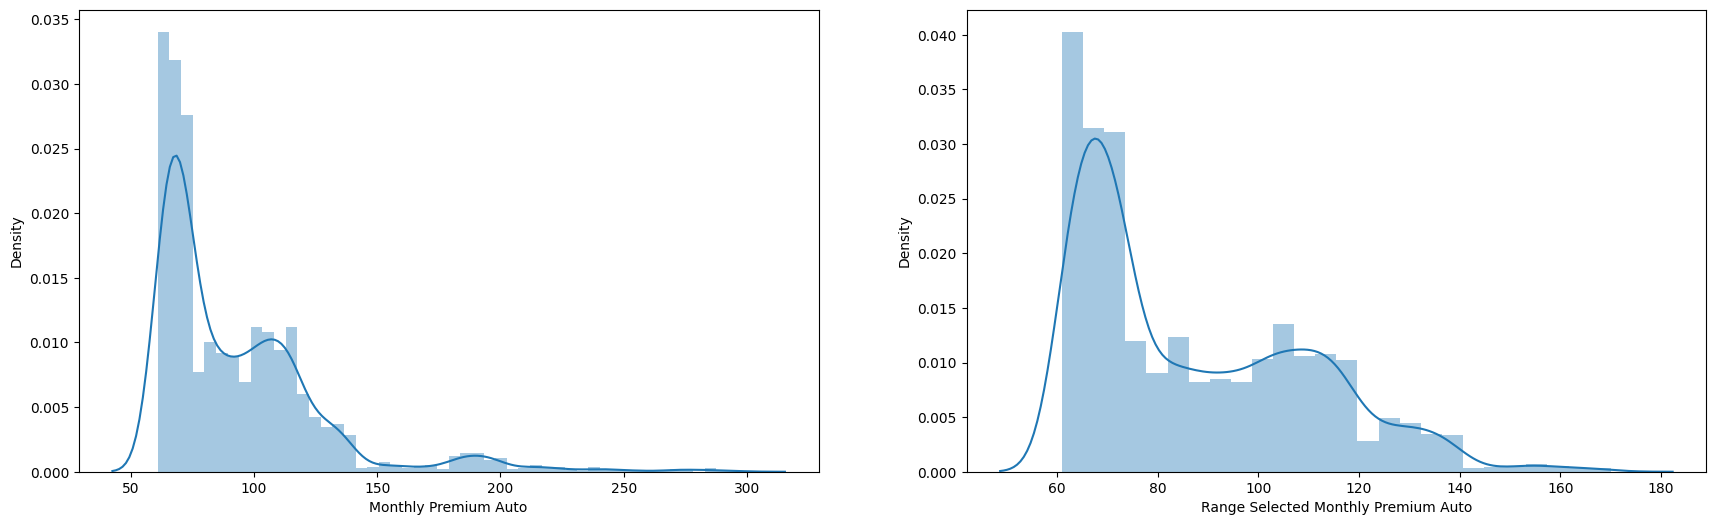

In [58]:
# Melakukan filtering pada data
df_model = df[(df['Monthly Premium Auto'] <= 170.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [59]:
# Cek deskriptif statistik kolom 'Monthly Premium Auto' setelah filtering
df_model['Monthly Premium Auto'].describe()

count    5394.000000
mean       87.253430
std        22.850803
min        61.000000
25%        68.000000
50%        79.000000
75%       105.000000
max       170.000000
Name: Monthly Premium Auto, dtype: float64

**Total Claim Amount**

In [60]:
df['Total Claim Amount'].describe()

count    5669.000000
mean      431.407103
std       287.558038
min         0.423310
25%       266.932542
50%       379.200000
75%       549.986128
max      2759.794354
Name: Total Claim Amount, dtype: float64

In [61]:
# Cek total klaim > $1000
df[df['Total Claim Amount'] > 1000].count()['Total Claim Amount']

242

Pada fitur 'Total Claim Amount', nilai yang lebih besar dari 1000 akan di-drop. Hal ini mempertimbangkan nilai batas atas dari metode IQR dan juga domain knowledge, yang mana nilai batas atas adalah $974.566507. Namun, akan ada lebih banyak data yang terbuang jika melimitasi dengan nilai > 600. Oleh karena itu, diputuskan untuk melimitasi data dengan host yang maksimal memiliki total kalim $1000. Terdapat 242 pengajuan klaim yang memiliki lebih dari $1000.

In [62]:
# Menerapkan limitasi data berdasar kolom 'Total Claim Amount'
df_model = df_model[(df_model['Total Claim Amount'] <= 1000)]

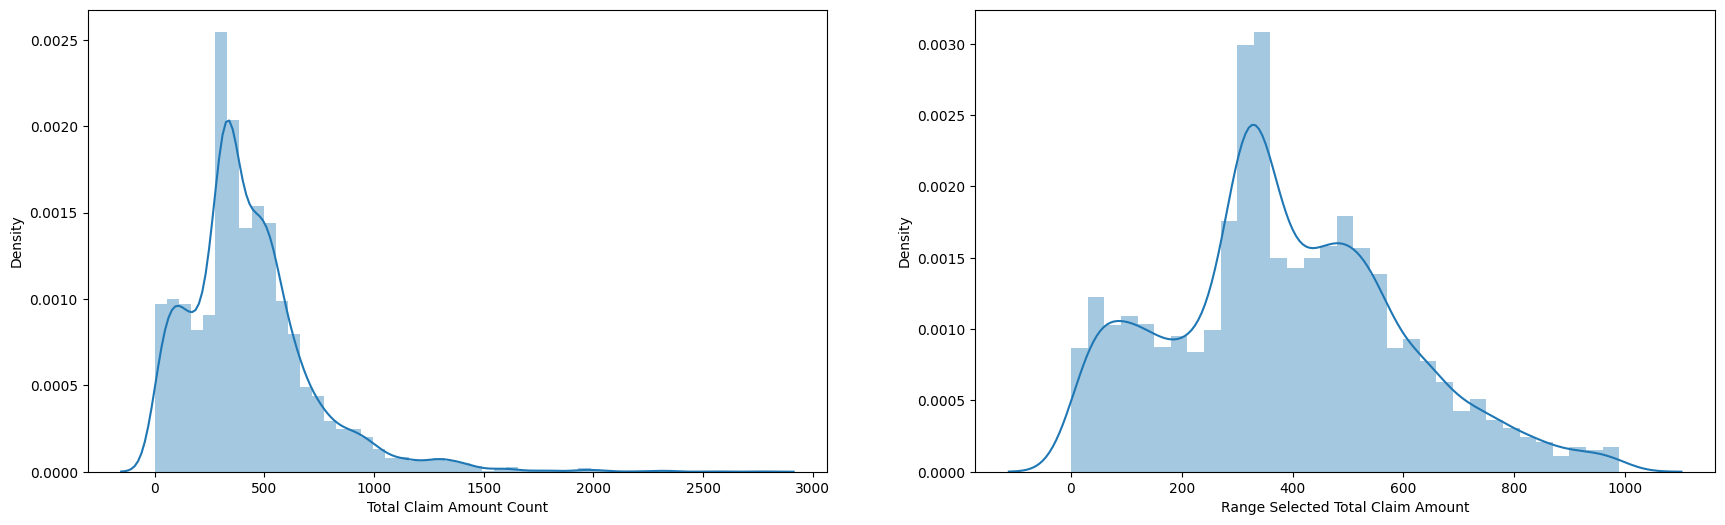

In [63]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount Count')
axes[1].set_xlabel('Range Selected Total Claim Amount');

**Income**

In [64]:
# Cek statistik deskriptif fitur 'Income'
df['Income'].describe()

count     5669.000000
mean     37868.188569
std      30490.490723
min          0.000000
25%          0.000000
50%      34322.000000
75%      62464.000000
max      99934.000000
Name: Income, dtype: float64

In [65]:
# Cek total pendapatan = 0
df[df['Income'] == 0].count()['Income']

1429

Terdapat 1429 data dengan nilai pendapatannya = 0. Hal ini bisa saja terjadi karena sejumlah pelanggan tersebut berstatus tidak bekerja. 

**Customer Lifetime Value**

In [66]:
# Cek statistik deskriptif fitur 'Customer Lifetime Value'
df['Customer Lifetime Value'].describe()

count     5669.000000
mean      8029.874592
std       6916.708246
min       1898.007675
25%       3954.344534
50%       5800.188903
75%       9031.214859
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [67]:
# Cek total Customer Lifetime Value > $17000
df[df['Customer Lifetime Value'] >= 17000].count()['Customer Lifetime Value']

475

Pada fitur 'Customer Lifetime Value' terlihat bahwa 75% data nilai kurang dari $9031 sedangkan nilai maksimalnya $83325, sedangkan nilai maksimalnya adalah $83325. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 475 data yang nilai Customer Lifetime Value lebih besar dari $17000 (batas atas berdasarkan metode IQR=16646). Oleh karena itu, data yang memiliki MCustomer Lifetime Value lebih besar dari $17000 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

In [68]:
# Menerapkan limitasi data berdasar kolom 'Customer Lifetime Value'
df_model = df_model[(df_model['Customer Lifetime Value'] <= 17000)]

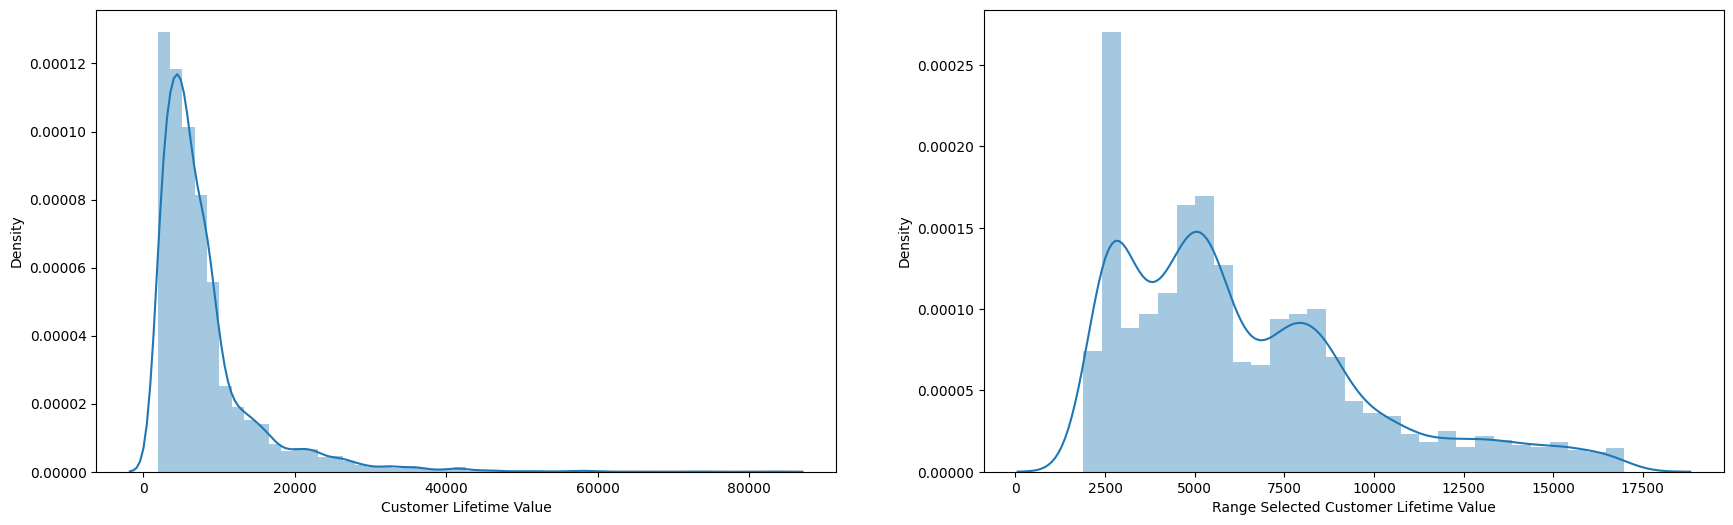

In [69]:
# Melakukan filtering pada data
df_model = df[(df['Customer Lifetime Value'] <= 17000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value');

### **Modeling**

In [70]:
# Import library

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Marital Status           5669 non-null   object 
 3   Education                5669 non-null   object 
 4   Number of Policies       5669 non-null   float64
 5   Monthly Premium Auto     5669 non-null   float64
 6   Total Claim Amount       5669 non-null   float64
 7   Income                   5669 non-null   float64
 8   Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(4)
memory usage: 398.7+ KB


In [72]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Coverage','Marital Status','Education']),
    ('Binary', ce.BinaryEncoder(), ['Vehicle Class'])
], remainder='passthrough')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Marital Status           5669 non-null   object 
 3   Education                5669 non-null   object 
 4   Number of Policies       5669 non-null   float64
 5   Monthly Premium Auto     5669 non-null   float64
 6   Total Claim Amount       5669 non-null   float64
 7   Income                   5669 non-null   float64
 8   Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(4)
memory usage: 398.7+ KB


**Data Splitting**

In [74]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Monthly Premium Auto'], axis=1)
y = df_model['Monthly Premium Auto']

**Train and Test Splitting**

In [75]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [76]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-13.15276468  -6.33167264 -14.14715786 -16.11747998 -14.57706472] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-7.7487132  -4.94586346 -7.98008175 -8.93265748 -8.07404322] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.07640162 -0.05348198 -0.07829364 -0.08291335 -0.07840251] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -8.67152171  -9.78394678  -9.25483268 -11.13416442 -11.47148262] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-5.59534241 -5.56000499 -5.51848167 -6.35952205 -6.09733527] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.05829793 -

In [77]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-12.865228,3.403554,-7.536272,1.355832,-0.073899,0.010430
1,KNN Regressor,-10.063190,1.076887,-5.826137,0.339645,-0.059091,0.002255
2,DecisionTree Regressor,-6.470593,1.058808,-2.421661,0.116608,-0.024404,0.001386
3,XGBoost Regressor,-3.533827,0.379178,-2.027643,0.101650,-0.020765,0.000803


Pada data diatas terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih besar. Hal ini terjadi karena pada proses eksekusi RMSE nilai error di proses kuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini mengakibatkan nilai RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, mengakibatkan adanya perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan DecisionTree Regressor. 

Prediksi pada test set dengan menggunakan model XGBoost dan DecisionTree Regressor

In [78]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'DecisionTree Regressor': DecisionTreeRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,3.289556,1.822486,0.019528
DecisionTree Regressor,6.144632,2.301251,0.023649


- Ketika dilakukan proses pengecekan test set, performa RandomForest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari XGBoost.

**Tuning model XGBoost**

In [79]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [80]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1  
)

In [81]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Coverage',
                                                                                'Marital '
                                                                                'Status',
                                                                                'Education']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Vehicle '
                                                                                'Class'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [82]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.087727,0.026624,0.021601,0.001019,0.9,0.059948,119,8,0.05,5,...,0.107422,1,-0.023454,-0.023711,-0.021743,-0.023235,-0.022979,-0.023024,0.000685,1
20,0.825697,0.008806,0.021151,0.001672,0.9,0.007743,143,4,0.38,6,...,0.143664,2,-0.026151,-0.027577,-0.023860,-0.024892,-0.026167,-0.025729,0.001263,3
17,1.413186,0.027841,0.025478,0.001696,0.6,0.001,190,5,0.04,9,...,0.124089,5,-0.030523,-0.030969,-0.029213,-0.031820,-0.031215,-0.030748,0.000875,7
8,1.067832,0.018134,0.022080,0.001772,0.7,0.021544,182,6,0.31,2,...,0.131399,3,-0.023757,-0.026645,-0.025080,-0.026682,-0.024800,-0.025393,0.001128,2
43,1.193783,0.015413,0.022170,0.001005,0.5,0.16681,172,5,0.31,7,...,0.153161,4,-0.025952,-0.027963,-0.024216,-0.026433,-0.024405,-0.025794,0.001382,4


In [83]:
# Cek skor dan parameter terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -3.7566321912676957
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpiliH**

In [84]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,4.130338,2.18697,0.023152


**Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning**

In [85]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,3.289556,1.822486,0.019528


In [86]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,4.130338,2.18697,0.023152


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 2.897029,	1.947159,	0.021944
- RMSE, MAE & MAPE setelah tuning: 2.882217,	1.91481,	0.021919

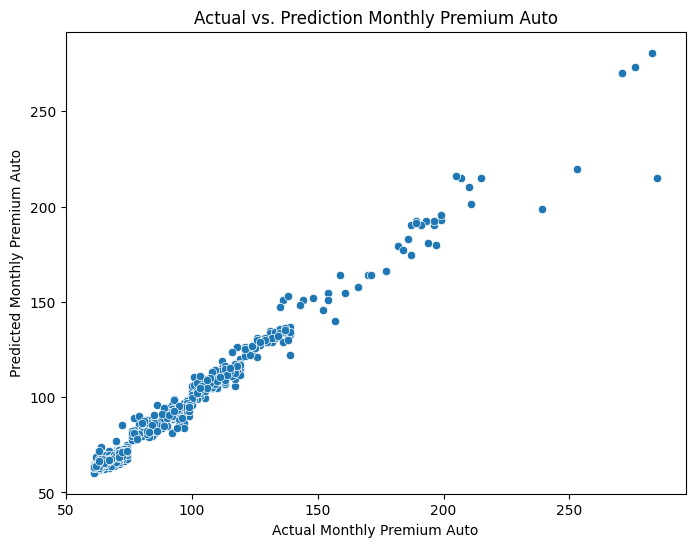

In [87]:
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Monthly Premium Auto', 
                                               xlabel='Actual Monthly Premium Auto', 
                                               ylabel='Predicted Monthly Premium Auto');

**Fitur Importance**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (nilai premi bulanan), kita dapat mengeceknya melalui function feature_importances_.

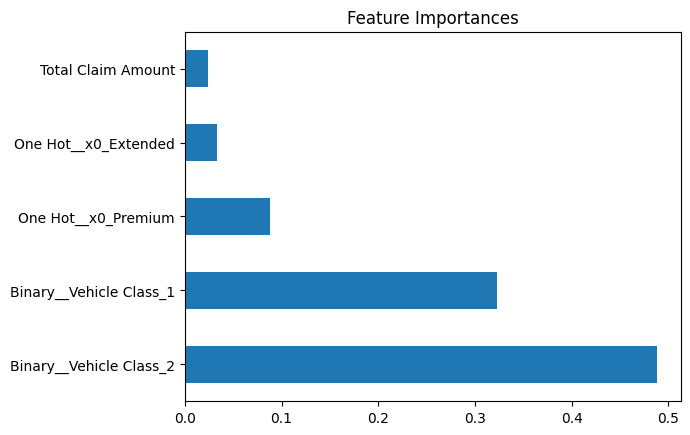

In [88]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Vehicle Class' dan 'Coverage' menjadi fitur yang paling berpengaruh terhadap 'Monthly Premium Auto' atau nilai premi bulanan.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~2%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga premi baru di Jenis Coverage yang ada pada rentang nilai seperti yang dilatih terhadap model (maksimal harga $170), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 2% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek status pernikahan, status pekerjaan, status pendidikan dan juga pendapatan, seperti single, unemployed, doctor atau pendapatannya 0, dan lain-lain.

 Model masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah pendapatan dari customer lifetime value. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

    Lakukan RMSPE/RMSLE/Residual Plot testing untuk menguji tingkat efektivitas model terhadap Customer Lifetime Value jika dibandingkan dengan Jenis kendaraan yang menentukan nilai premi dari pelanggan itu sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('Customer Lifetime Value'), seperti periode klaim pelanggan. Selain itu, adanya penambahan data terkini, tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update Customer Lifetime Value(pendapatan perusahaan) yang sudah selesai mengajukan klaim. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data analysis untuk mendapatkan insight dari pendapatan perusahaan dimasa yang akan datang. 
